In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows=999
pd.options.display.max_columns=999

In [3]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

In [4]:
data = pickle.load(open('../Data/data.pickle','rb'))

In [15]:
data.head()

,Country_Name,Average_Primary_School_Completion,Average_Female_Children_Employment,Average_Male_Children_Employment,Average_GDP_Spent_on_Education,Average_Population,Average_Urban_Population,Agricultural_Land,GINI_Index,ed_to_military_ratio,adolescent_birth_rate,improved_sanitation_total,immunization_avg,father_support,Region,IncomeGroup,High_income,Low_income,Lower_middle_income,Upper_middle_income,East_Asia_and_Pacific,Europe_and_Central_Asia,Latin_America_and_Caribbean,Middle_East_and_North_Africa,North_America,South_Asia,Sub_Saharan_Africa,relative_country_income
1,Angola,41.000475,30.100000,30.000000,NaN,18.382628,58.639895,46.671448,47.350000,0.827895,190.9,52.0,73.000,NaN,Sub-Saharan Africa,Lower middle income,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,Albania,97.193730,18.414440,24.173033,29.845680,107.789280,51.027526,42.261679,30.325000,NaN,17.6,93.0,86.000,52.8,Europe & Central Asia,Upper middle income,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3,United Arab Emirates,91.408940,NaN,NaN,NaN,97.491177,83.603789,6.716998,NaN,NaN,34.2,98.0,89.250,NaN,Middle East & North Africa,High income,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
4,Argentina,101.405976,6.643352,11.047324,13.124827,14.823043,90.614737,51.637240,45.770588,6.862963,69.6,96.0,82.000,56.7,Latin America & Caribbean,Upper middle income,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
5,Armenia,95.185489,7.500000,12.000000,10.983123,103.612610,63.624895,56.680303,32.023529,0.562925,22.7,89.0,82.375,NaN,Europe & Central Asia,Upper middle income,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2


In [11]:
data.columns = [name.replace('&','and').replace(' ','_').replace('-','_') for name in data.columns]
variables = data.columns[2:14].tolist() + data.columns.tolist()[16:]
# variables = data.columns[6:7].tolist()

In [12]:
variables

['Average_Female_Children_Employment',
 'Average_Male_Children_Employment',
 'Average_GDP_Spent_on_Education',
 'Average_Population',
 'Average_Urban_Population',
 'Agricultural_Land',
 'GINI_Index',
 'ed_to_military_ratio',
 'adolescent_birth_rate',
 'improved_sanitation_total',
 'immunization_avg',
 'father_support',
 'High_income',
 'Low_income',
 'Lower_middle_income',
 'Upper_middle_income',
 'East_Asia_and_Pacific',
 'Europe_and_Central_Asia',
 'Latin_America_and_Caribbean',
 'Middle_East_and_North_Africa',
 'North_America',
 'South_Asia',
 'Sub_Saharan_Africa',
 'relative_country_income']

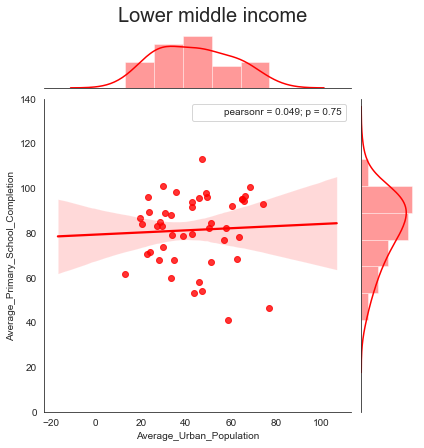

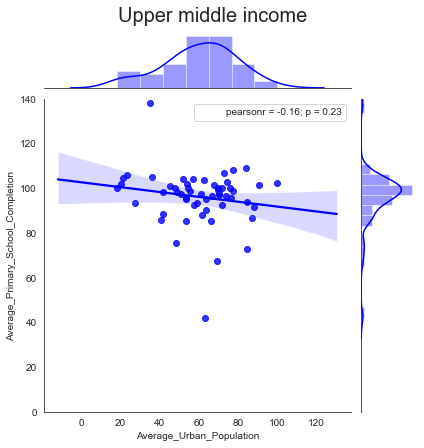

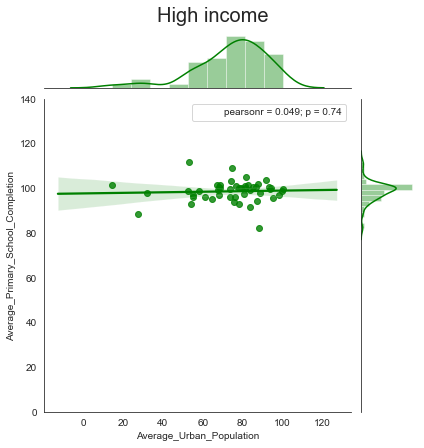

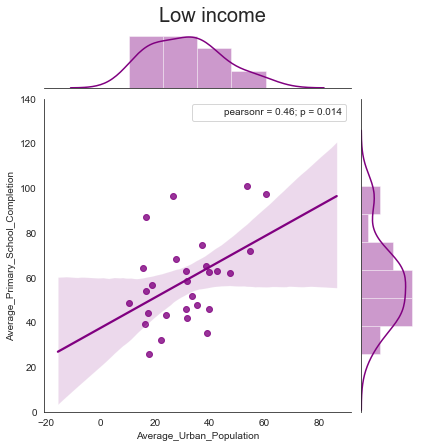

In [38]:
colors = ['red','blue','green','purple']
count=0
for region in list(zip(data['IncomeGroup'].unique(),colors)):
    plots = sns.jointplot(x='Average_Urban_Population',
                  y='Average_Primary_School_Completion',
                  data=data[data['IncomeGroup']==region[0]],
                  color=region[1], label=region[0], kind='reg',
                  ylim=(0,140))
    plots.fig.suptitle(region[0],y=1.03,fontsize=20)
    plots.annotate(stats.pearsonr)
    count+=1

Our hypothesis with 95% confidence is:

H<sub>0</sub> : `Income does not effect the Average Urban Population and Primary School Completion relationship`

H<sub>a</sub> : `Income does effect the Average Urban Population and Primary School Completion relationship`

Low income is the only income group with a significant p-value, so we can reject the null hypothesis for low income.
All the other income groups have insignificant p-values, so we fail to reject the null hypothesis for them.

Interaction term: $$LI \cdot AUP$$
(LI = Low Income, AUP= Average Urban Population)

In [32]:
data2=data.copy()
data2['li_aup']=data2['Low_income']*data2['Average_Urban_Population']
data2['al_im']=data2['Agricultural_Land']*data2['immunization_avg']
data2['san_imm']=data2['improved_sanitation_total']*data2['immunization_avg']

In [33]:
corr = data2[['Average_Primary_School_Completion','Average_Urban_Population',
             'Agricultural_Land','adolescent_birth_rate','improved_sanitation_total',
             'immunization_avg','Low_income']].corr()

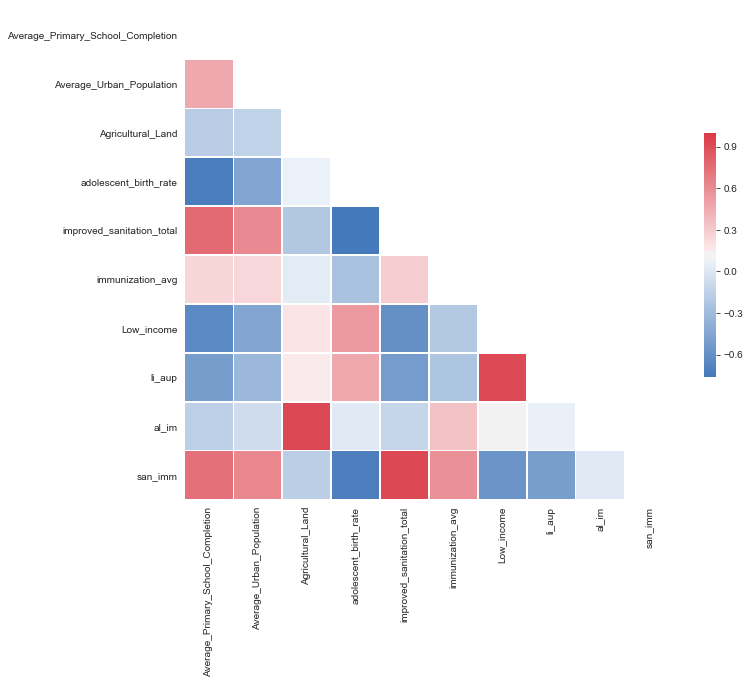

In [34]:
CorrMtx(corr,dropDuplicates=True)

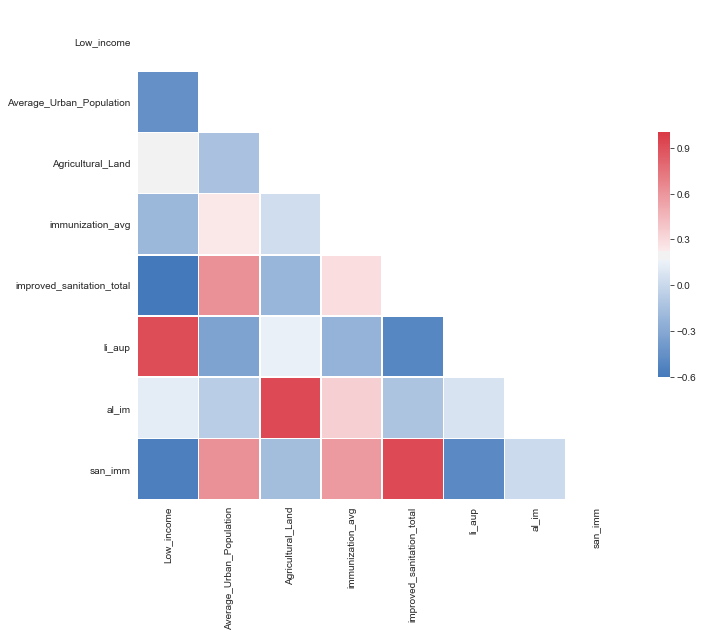

In [36]:
corr_int = data2[['Low_income','Average_Urban_Population',
                  'Agricultural_Land','immunization_avg',
                  'improved_sanitation_total',
                  'li_aup','al_im','san_imm']].corr()
CorrMtx(corr_int,dropDuplicates=True)

In [108]:
mlr_model = ols(formula="Average_Primary_School_Completion~"+"+".join(variables), data=data).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Average_Primary_School_Completion   R-squared:                       0.923
Model:                                           OLS   Adj. R-squared:                  0.813
Method:                                Least Squares   F-statistic:                     8.370
Date:                               Wed, 21 Aug 2019   Prob (F-statistic):           9.97e-05
Time:                                       16:20:07   Log-Likelihood:                -108.85
No. Observations:                                 35   AIC:                             259.7
Df Residuals:                                     14   BIC:                             292.4
Df Model:                                         20                                         
Covariance Type:                           nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             31.0057     16.528      1.876      0.082      -4.443      66.455
Average_Female_Children_Employment     0.4553      0.649      0.701      0.495      -0.937       1.848
Average_Male_Children_Employment      -0.3042      0.613     -0.496      0.628      -1.619       1.011
Average_GDP_Spent_on_Education        -0.1293      0.218     -0.595      0.562      -0.596       0.337
Average_Population                    -0.0056      0.014     -0.398      0.697      -0.036       0.024
Average_Urban_Population               0.3016      0.144      2.097      0.055      -0.007       0.610
Agricultural_Land                     -0.0157      0.116     -0.136      0.894      -0.264       0.232
GINI_Index                             0.5103      0.501      1.019      0.325      -0.564       1.584
ed_to_military_ratio                   0.0434      0.434      0.100      0.922      -0.887       0.974
adolescent_birth_rate                 -0.1941      0.077     -2.537      0.024      -0.358      -0.030
improved_sanitation_total              0.0511      0.161      0.317      0.756      -0.294       0.396
immunization_avg                       0.1137      0.162      0.702      0.494      -0.234       0.461
father_support                        -0.0513      0.118     -0.434      0.671      -0.305       0.202
High_income                           -4.2167      4.900     -0.861      0.404     -14.726       6.292
Low_income                            18.9402     10.951      1.729      0.106      -4.548      42.429
Lower_middle_income                   12.6110      6.925      1.821      0.090      -2.241      27.463
Upper_middle_income                    3.6712      5.533      0.664      0.518      -8.195      15.538
East_Asia_and_Pacific                 12.3248      4.863      2.534      0.024       1.894      22.756
Europe_and_Central_Asia               15.0717      7.887      1.911      0.077      -1.843      31.987
Latin_America_and_Caribbean            4.6587      9.499      0.490      0.631     -15.715      25.033
Middle_East_and_North_Africa          -3.2766      8.576     -0.382      0.708     -21.670      15.117
North_America                               0          0        nan        nan           0           0
South_Asia                            13.5055      9.365      1.442      0.171      -6.581      33.592
Sub_Saharan_Africa                   -11.2785      7.039     -1.602      0.131     -26.377       3.820
relative_country_income                7.3032      5.849      1.249      0.232      -5.242      19.848
==================================

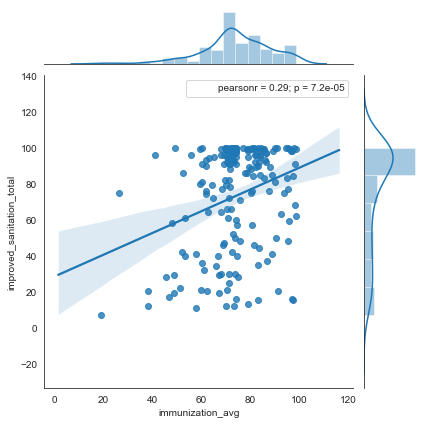

In [118]:
sns.jointplot(x='immunization_avg',y='improved_sanitation_total',data=data,kind='reg').annotate(stats.pearsonr)

In [126]:
mlr_model = ols(formula="Average_Primary_School_Completion~Average_Population+Average_Urban_Population+Agricultural_Land+adolescent_birth_rate+improved_sanitation_total+immunization_avg+relative_country_income", data=data).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Average_Primary_School_Completion   R-squared:                       0.632
Model:                                           OLS   Adj. R-squared:                  0.616
Method:                                Least Squares   F-statistic:                     38.52
Date:                               Wed, 21 Aug 2019   Prob (F-statistic):           4.64e-31
Time:                                       17:55:26   Log-Likelihood:                -630.46
No. Observations:                                165   AIC:                             1277.
Df Residuals:                                    157   BIC:                             1302.
Df Model:                                          7                                         
Covariance Type:                           nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    66.0217      7.176      9.200      0.000      51.848      80.196
Average_Population         8.417e-05      0.002      0.054      0.957      -0.003       0.003
Average_Urban_Population     -0.0242      0.055     -0.440      0.661      -0.133       0.085
Agricultural_Land            -0.0284      0.043     -0.658      0.512      -0.114       0.057
adolescent_birth_rate        -0.1150      0.029     -3.910      0.000      -0.173      -0.057
improved_sanitation_total     0.2877      0.059      4.919      0.000       0.172       0.403
immunization_avg              0.0886      0.069      1.288      0.200      -0.047       0.225
relative_country_income       1.9356      1.621      1.194      0.234      -1.266       5.137
==============================================================================
Omnibus:                        9.866   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               20.311
Skew:                          -0.146   Prob(JB):                     3.89e-05
Kurtosis:                       4.694   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
mlr_model = ols(formula="Average_Primary_School_Completion~improved_sanitation_total+adolescent_birth_rate+Sub_Saharan_Africa*High_income+Sub_Saharan_Africa*Low_income", data=data2).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Average_Primary_School_Completion   R-squared:                       0.703
Model:                                           OLS   Adj. R-squared:                  0.690
Method:                                Least Squares   F-statistic:                     53.36
Date:                               Wed, 21 Aug 2019   Prob (F-statistic):           1.76e-38
Time:                                       18:53:36   Log-Likelihood:                -621.67
No. Observations:                                166   AIC:                             1259.
Df Residuals:                                    158   BIC:                             1284.
Df Model:                                          7                                         
Covariance Type:                           nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         82.0136      5.175     15.847      0.000      71.792      92.235
improved_sanitation_total          0.2091      0.055      3.785      0.000       0.100       0.318
adolescent_birth_rate             -0.0961      0.029     -3.324      0.001      -0.153      -0.039
Sub_Saharan_Africa                -7.3876      3.250     -2.273      0.024     -13.806      -0.969
High_income                       -2.5105      2.316     -1.084      0.280      -7.084       2.063
Sub_Saharan_Africa:High_income    24.9957     11.077      2.257      0.025       3.118      46.874
Low_income                         1.8188      5.385      0.338      0.736      -8.818      12.456
Sub_Saharan_Africa:Low_income    -15.5070      6.371     -2.434      0.016     -28.090      -2.924
==============================================================================
Omnibus:                       22.383   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.272
Skew:                          -0.486   Prob(JB):                     3.00e-14
Kurtosis:                       5.839   Cond. No.                     1.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
data2 = data.copy()
data2['ssaXrci']=data2.apply(lambda x: x['Sub_Saharan_Africa']*x['relative_country_income'], axis=1)
data2['upXabr']=data2['Average_Urban_Population']*data2['adolescent_birth_rate']

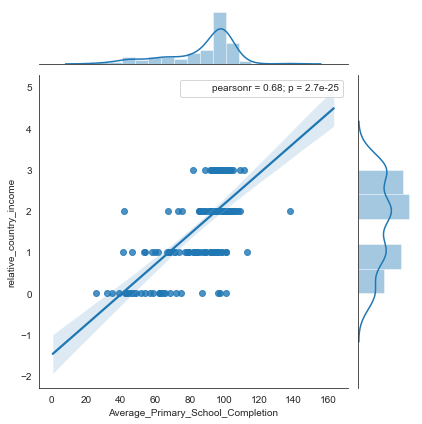

In [130]:
sns.jointplot(x='Average_Primary_School_Completion',y='relative_country_income',data=data,kind='reg').annotate(stats.pearsonr)

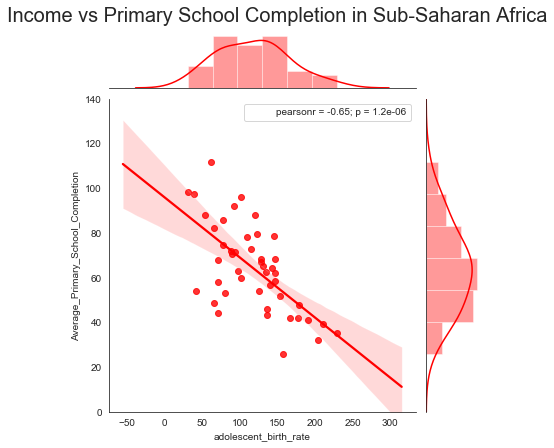

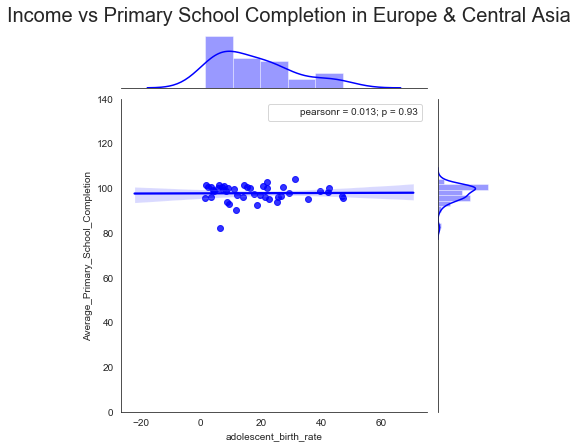

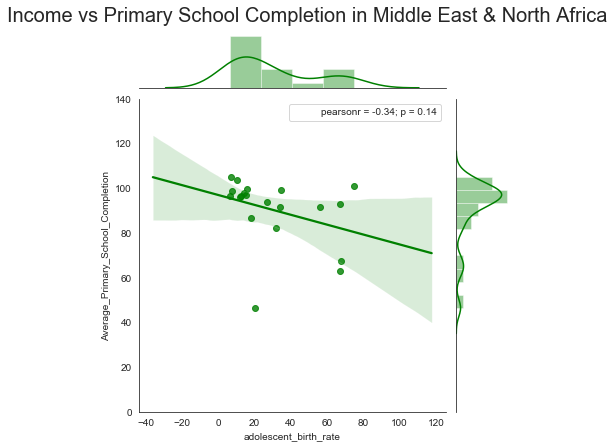

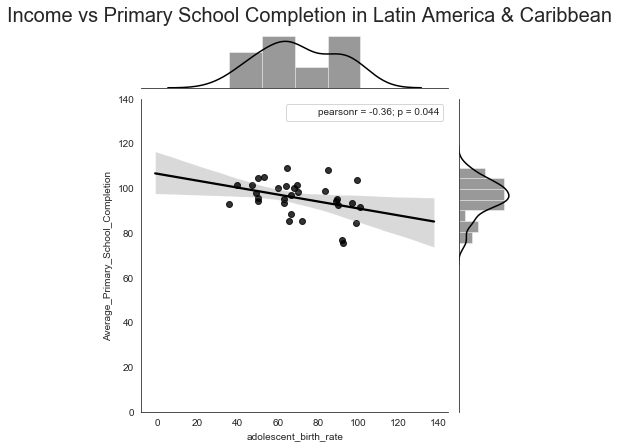

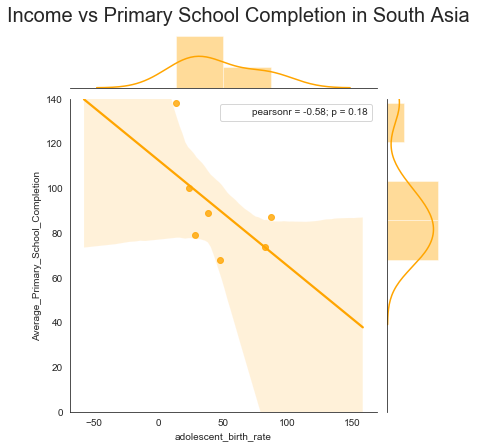

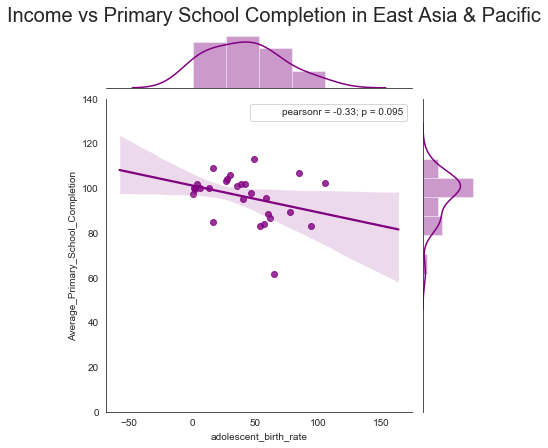

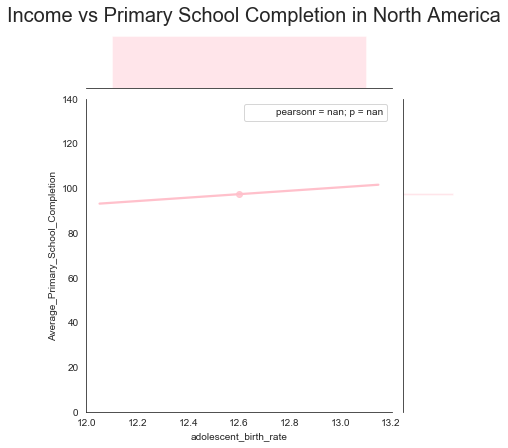

In [152]:
colors = ['red','blue','green','black','orange','purple','pink']
count=0
for region in list(zip(data['Region'].unique(),colors)):
    plots = sns.jointplot(x='adolescent_birth_rate',
                  y='Average_Primary_School_Completion',
                  data=data[data['Region']==region[0]],
                  color=region[1], label=region[0], kind='reg',
                  ylim=(0,140))
    plots.fig.suptitle('Income vs Primary School Completion in '+region[0],y=1.03,fontsize=20)
    plots.annotate(stats.pearsonr)
    count+=1

In [171]:
data.columns

Index(['Country_Name', 'Average_Primary_School_Completion',
       'Average_Female_Children_Employment',
       'Average_Male_Children_Employment', 'Average_GDP_Spent_on_Education',
       'Average_Population', 'Average_Urban_Population', 'Agricultural_Land',
       'GINI_Index', 'ed_to_military_ratio', 'adolescent_birth_rate',
       'improved_sanitation_total', 'immunization_avg', 'father_support',
       'Region', 'IncomeGroup', 'High_income', 'Low_income',
       'Lower_middle_income', 'Upper_middle_income', 'East_Asia_and_Pacific',
       'Europe_and_Central_Asia', 'Latin_America_and_Caribbean',
       'Middle_East_and_North_Africa', 'North_America', 'South_Asia',
       'Sub_Saharan_Africa', 'relative_country_income'],
      dtype='object')

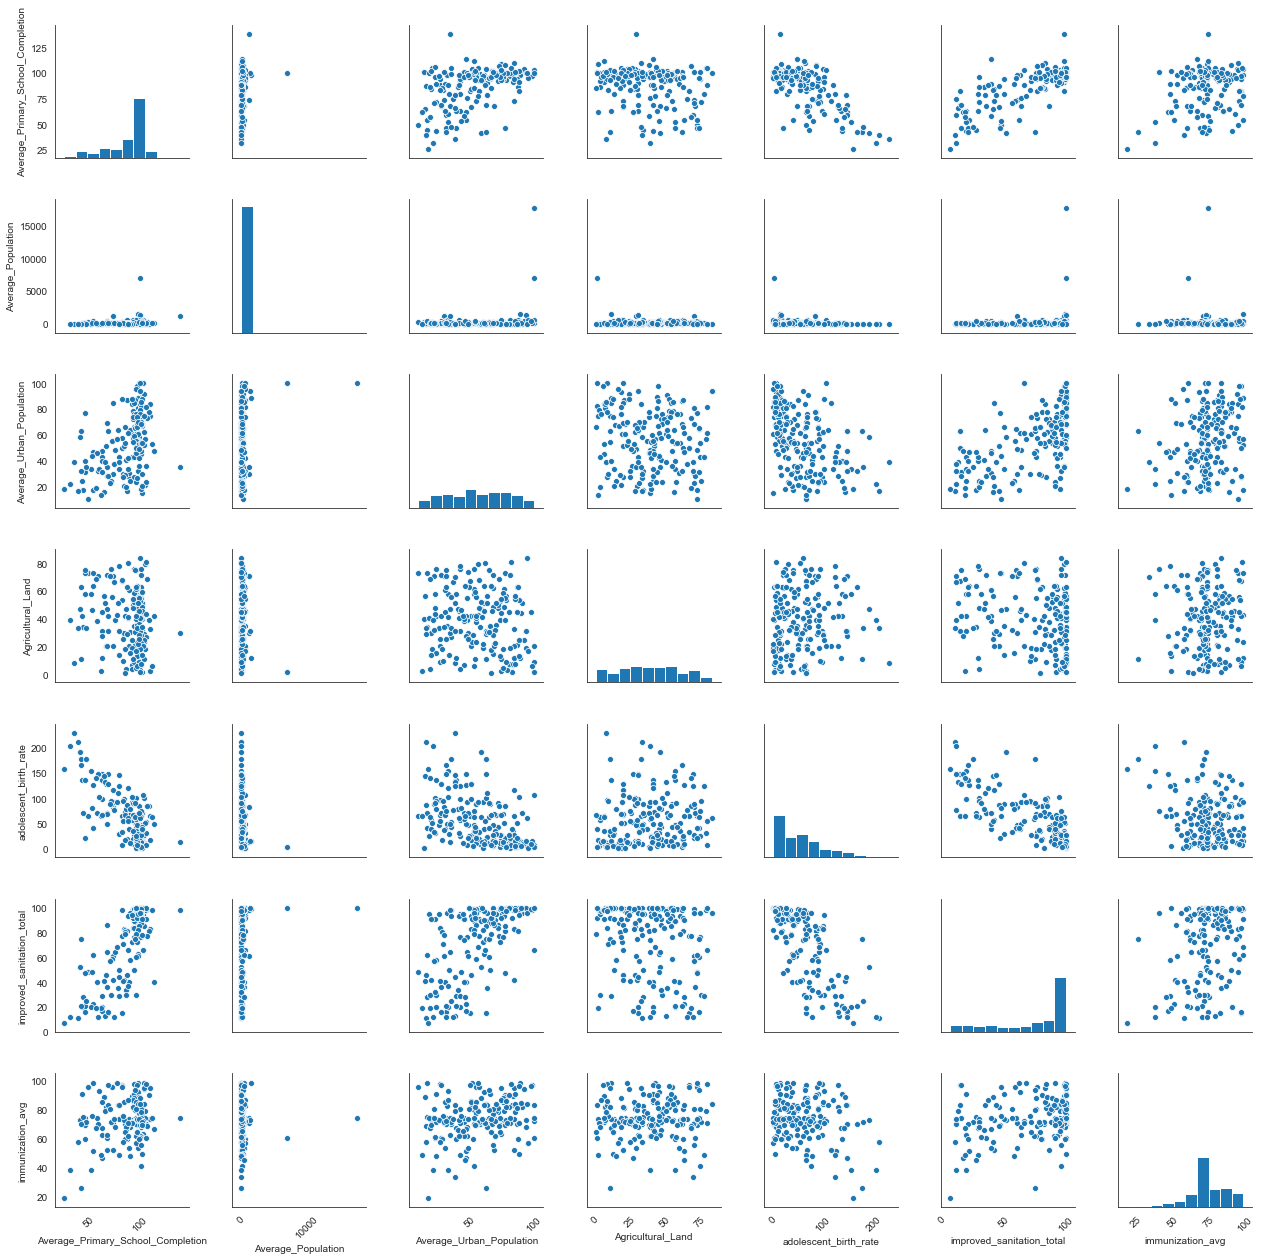

In [176]:
g = sns.pairplot(data[["Average_Primary_School_Completion",
                       "Average_Population", "Average_Urban_Population",
                       "Agricultural_Land", "adolescent_birth_rate",
                       "improved_sanitation_total","immunization_avg"]], diag_kind="hist")
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

In [189]:
features = ['Average_Population','Average_Urban_Population','Agricultural_Land',
            'adolescent_birth_rate','improved_sanitation_total','immunization_avg']
data2 = data.copy()
scalar = StandardScaler()
scalar.fit(data2[features])
scaled_features=scalar.transform(data2[features])
scaled_data = pd.DataFrame(scaled_features,columns=features,index=data2.index)
scaled_data['Average_Primary_School_Completion'] = data2['Average_Primary_School_Completion']
scaled_data['Region'] = data2['Region'].str.slice(0,3)
scaled_data.head()


,Average_Population,Average_Urban_Population,Agricultural_Land,adolescent_birth_rate,improved_sanitation_total,immunization_avg,Average_Primary_School_Completion,Region
1,-0.185898,0.119534,0.329126,2.772705,-0.730386,-0.068527,41.000475,Sub
2,-0.120297,-0.209186,0.124904,-0.814251,0.686609,0.864858,97.193730,Eur
3,-0.127853,1.197532,-1.521216,-0.470665,0.859413,1.098205,91.408940,Mid
4,-0.188510,1.500281,0.559098,0.262043,0.790291,0.577663,101.405976,Lat
5,-0.123362,0.334798,0.792649,-0.708692,0.548365,0.604587,95.185489,Eur


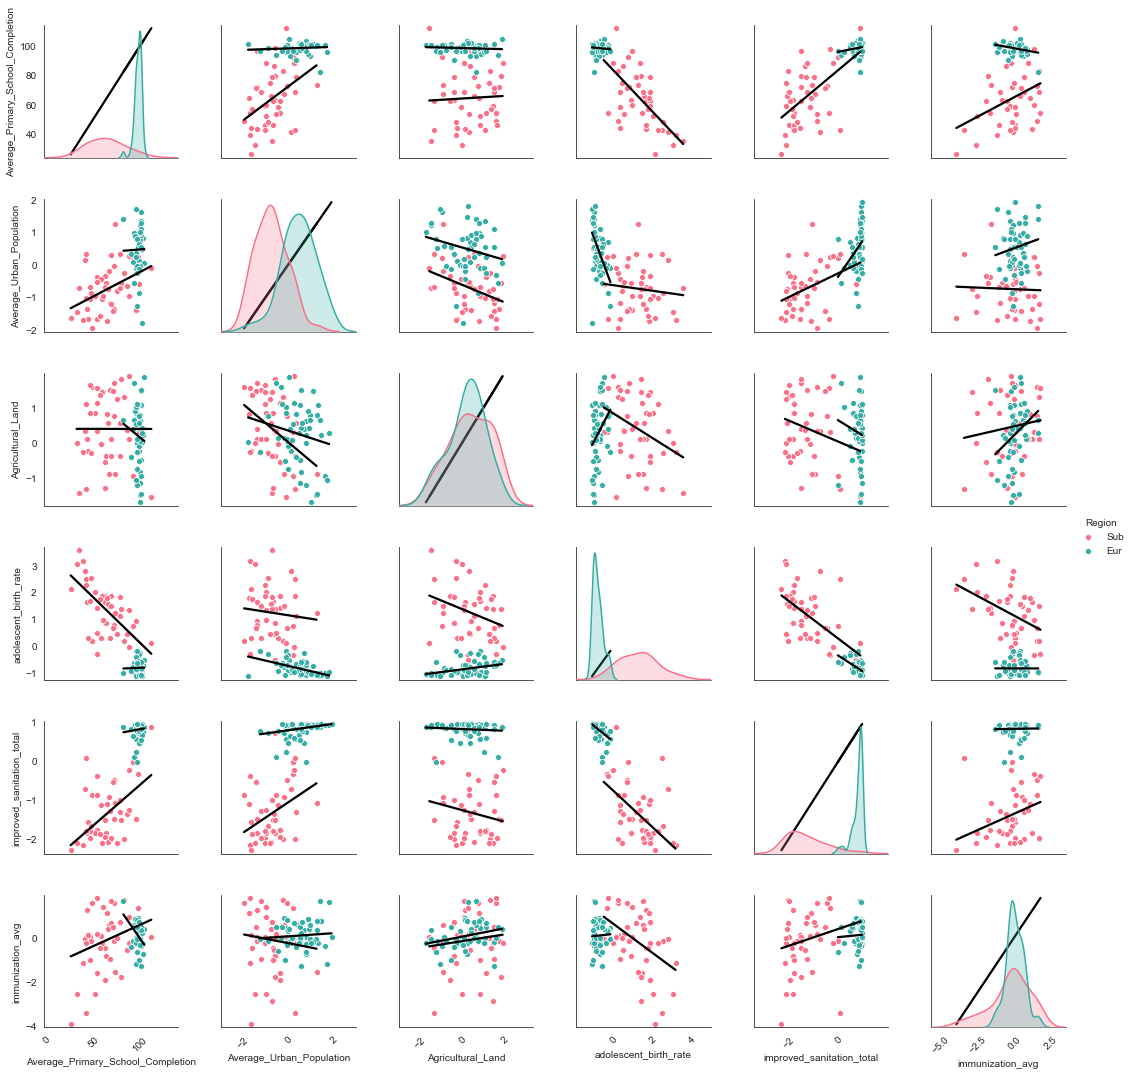

In [237]:
g = sns.pairplot(vars=["Average_Primary_School_Completion",
                       "Average_Urban_Population",
                       "Agricultural_Land", "adolescent_birth_rate",
                       "improved_sanitation_total","immunization_avg"],
                       hue='Region', palette='husl',
                       data=scaled_data[scaled_data['Region'].isin(['Sub','Eur'])])
g.map(sns.regplot,truncate=True,ci=None,color='black',scatter=False,robust=True)
# g.map_lower(sns.regplot,truncate=True,ci=None,color='black',scatter=False,robust=True)
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.autoscale(enable=True, tight=True)

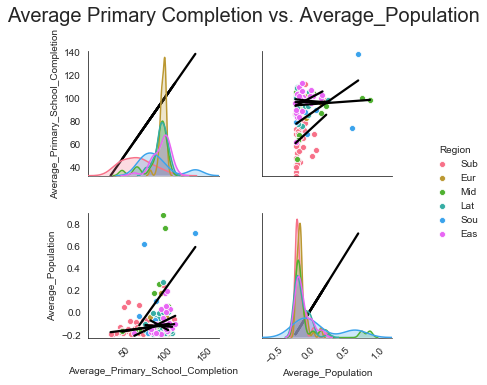

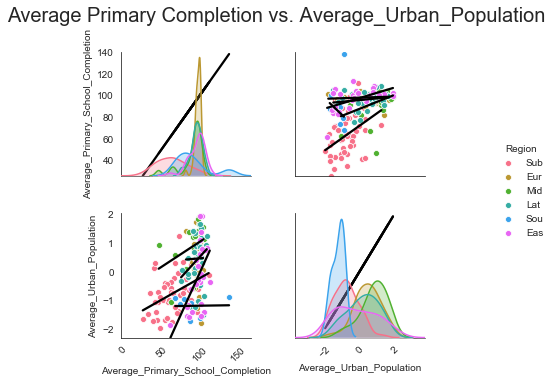

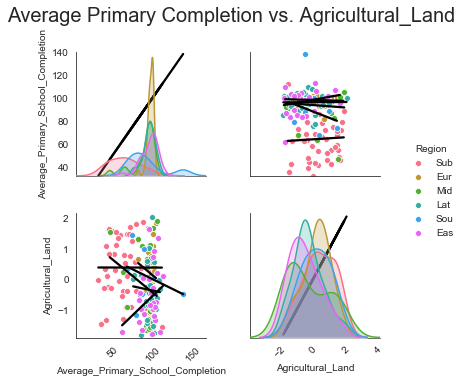

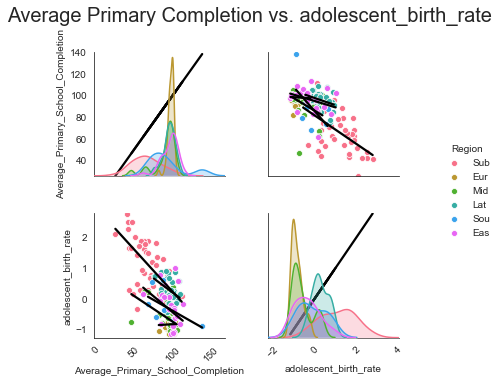

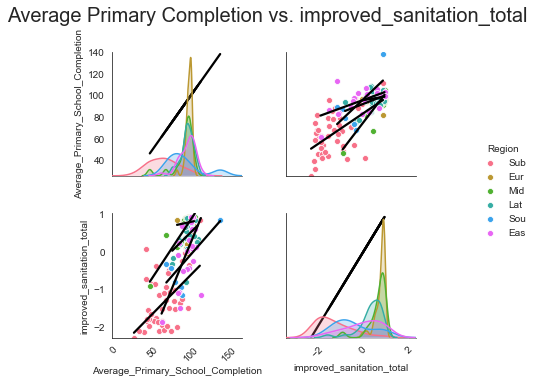

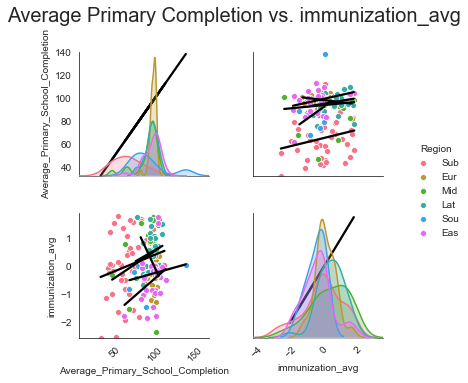

In [248]:
for feature in features:
    g = sns.pairplot(vars=["Average_Primary_School_Completion",feature],
                       hue='Region', palette='husl',
                       data=scaled_data[(~scaled_data['Region'].isin(['Nor']))&(scaled_data[feature]<3)&(scaled_data[feature]>-3)])
    g.map(sns.regplot,truncate=True,ci=None,color='black',scatter=False,robust=True)
    g.fig.suptitle(f'Average Primary Completion vs. {feature}',y=1.03,fontsize=20)
    # g.map_lower(sns.regplot,truncate=True,ci=None,color='black',scatter=False,robust=True)
    for ax in g.axes.flat: 
        plt.setp(ax.get_xticklabels(), rotation=45)
        ax.autoscale(enable=True, tight=True)

In [240]:
mlr_model = ols(formula="Average_Primary_School_Completion~"+"+".join(features), data=scaled_data[(~scaled_data['Region'].isin(['Nor']))&(scaled_data[feature]<3)&(scaled_data[feature]>-3)]).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Average_Primary_School_Completion   R-squared:                       0.633
Model:                                           OLS   Adj. R-squared:                  0.619
Method:                                Least Squares   F-statistic:                     44.88
Date:                               Thu, 22 Aug 2019   Prob (F-statistic):           1.38e-31
Time:                                       11:52:39   Log-Likelihood:                -620.24
No. Observations:                                163   AIC:                             1254.
Df Residuals:                                    156   BIC:                             1276.
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    88.1403      0.880    100.154      0.000      86.402      89.879
Average_Population           -0.2007      2.106     -0.095      0.924      -4.361       3.960
Average_Urban_Population      0.3436      1.115      0.308      0.758      -1.859       2.546
Agricultural_Land            -1.0767      0.894     -1.205      0.230      -2.842       0.689
adolescent_birth_rate        -4.7621      1.425     -3.342      0.001      -7.576      -1.948
improved_sanitation_total    10.0923      1.560      6.468      0.000       7.010      13.174
immunization_avg              0.4493      0.982      0.457      0.648      -1.491       2.390
==============================================================================
Omnibus:                        9.715   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               21.528
Skew:                          -0.036   Prob(JB):                     2.11e-05
Kurtosis:                       4.779   Cond. No.                         3.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
scaled_data['IncomeGroup']=data2['IncomeGroup']
scaled_data = pd.concat([scaled_data,pd.get_dummies(scaled_data['IncomeGroup']),
                         pd.get_dummies(scaled_data['Region'])],1)
scaled_data.head()

,Average_Population,Average_Urban_Population,Agricultural_Land,adolescent_birth_rate,improved_sanitation_total,immunization_avg,Average_Primary_School_Completion,Region,IncomeGroup,High income,Low income,Lower middle income,Upper middle income,Eas,Eur,Lat,Mid,Nor,Sou,Sub,High income,Low income,Lower middle income,Upper middle income,Eas,Eur,Lat,Mid,Nor,Sou,Sub
1,-0.185898,0.119534,0.329126,2.772705,-0.730386,-0.068527,41.000475,Sub,Lower middle income,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,-0.120297,-0.209186,0.124904,-0.814251,0.686609,0.864858,97.193730,Eur,Upper middle income,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,-0.127853,1.197532,-1.521216,-0.470665,0.859413,1.098205,91.408940,Mid,High income,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,-0.188510,1.500281,0.559098,0.262043,0.790291,0.577663,101.405976,Lat,Upper middle income,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,-0.123362,0.334798,0.792649,-0.708692,0.548365,0.604587,95.185489,Eur,Upper middle income,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Average_Primary_School_Completion   R-squared:                       0.629
Model:                                           OLS   Adj. R-squared:                  0.615
Method:                                Least Squares   F-statistic:                     44.58
Date:                               Thu, 22 Aug 2019   Prob (F-statistic):           1.33e-31
Time:                                       11:46:28   Log-Likelihood:                -631.21
No. Observations:                                165   AIC:                             1276.
Df Residuals:                                    158   BIC:                             1298.
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    87.9214      0.893     98.414      0.000      86.157      89.686
Average_Population            0.0483      2.145      0.023      0.982      -4.189       4.285
Average_Urban_Population      0.1367      1.135      0.121      0.904      -2.104       2.377
Agricultural_Land            -0.8814      0.905     -0.974      0.332      -2.669       0.906
adolescent_birth_rate        -5.9352      1.386     -4.281      0.000      -8.674      -3.197
improved_sanitation_total     9.1362      1.553      5.884      0.000       6.069      12.203
immunization_avg              1.2356      0.960      1.288      0.200      -0.660       3.131
==============================================================================
Omnibus:                       10.982   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               23.775
Skew:                          -0.179   Prob(JB):                     6.88e-06
Kurtosis:                       4.825   Cond. No.                         3.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

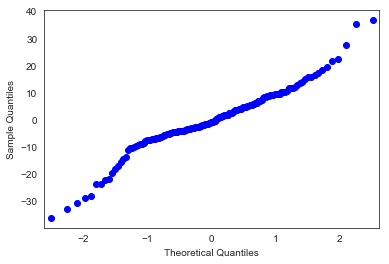

In [238]:
mlr_model = ols(formula="Average_Primary_School_Completion~"+"+".join(features), data=scaled_data).fit()
sm.qqplot(mlr_model.resid)
mlr_model.summary()

In [247]:
data2[features+['Average_Primary_School_Completion']].sort_values('Average_Primary_School_Completion')

,Average_Population,Average_Urban_Population,Agricultural_Land,adolescent_birth_rate,improved_sanitation_total,immunization_avg,Average_Primary_School_Completion
151,NaN,17.841211,NaN,158.00,7.0,19.250,25.733910
160,9.296887,22.092632,39.245366,203.40,12.0,38.250,31.961525
25,6.794024,39.005263,8.261242,229.00,NaN,NaN,35.062418
119,12.820258,16.250263,33.582305,210.00,11.0,58.000,39.204390
1,18.382628,58.639895,46.671448,190.90,52.0,73.000,41.000475
64,32.898199,62.937316,10.890217,177.00,75.0,26.375,42.075974
113,29.435601,31.842684,62.806037,166.00,21.0,70.375,42.158185
11,56.071821,23.869526,41.724716,136.00,20.0,91.125,43.312480
53,86.244572,17.257263,34.258271,71.20,28.0,75.125,44.042136
63,53.526101,39.748316,57.599782,136.70,21.0,59.875,45.846244


In [396]:
scaled_data2=scaled_data.copy()
for feature in features:
    scaled_data2[scaled_data2[feature].abs()>2] = np.nan

In [397]:
scaled_data2.dropna(inplace=True)

In [393]:
scaled_data2.shape

(150, 31)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Average_Primary_School_Completion   R-squared:                       0.604
Model:                                           OLS   Adj. R-squared:                  0.588
Method:                                Least Squares   F-statistic:                     39.09
Date:                               Thu, 22 Aug 2019   Prob (F-statistic):           1.28e-28
Time:                                       14:31:02   Log-Likelihood:                -610.71
No. Observations:                                161   AIC:                             1235.
Df Residuals:                                    154   BIC:                             1257.
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    88.8545      1.002     88.653      0.000      86.874      90.834
Average_Population            5.1372      5.405      0.950      0.343      -5.541      15.816
Average_Urban_Population      0.3899      1.110      0.351      0.726      -1.803       2.583
Agricultural_Land            -1.1936      0.885     -1.348      0.180      -2.942       0.555
adolescent_birth_rate        -3.7462      1.471     -2.547      0.012      -6.652      -0.840
improved_sanitation_total    10.2577      1.557      6.589      0.000       7.182      13.333
immunization_avg             -0.1041      0.996     -0.105      0.917      -2.072       1.864
==============================================================================
Omnibus:                        9.483   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               19.055
Skew:                          -0.145   Prob(JB):                     7.28e-05
Kurtosis:                       4.660   Cond. No.                         8.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

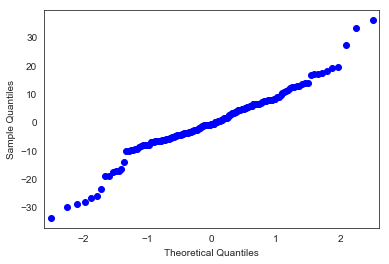

In [268]:
mlr_model = ols(formula="Average_Primary_School_Completion~"+"+".join(features), data=scaled_data2).fit()
sm.qqplot(mlr_model.resid)
mlr_model.summary()

In [413]:
scaled_data2['pop_dense_transformed']=(scaled_data2['Average_Population']+2*(scaled_data2['Average_Population'].std()))**0.3
# scaled_data2['avg_prim']=np.log(scaled_data2['Average_Primary_School_Completion'])/np.log(2)
scaled_data2['avg_prim']=(scaled_data2['Average_Primary_School_Completion'])**2
scaled_data2['adol_transform'] = (scaled_data2['adolescent_birth_rate']+3)**0.5
scaled_data2['san_transforme'] = 4.5**scaled_data2['improved_sanitation_total']

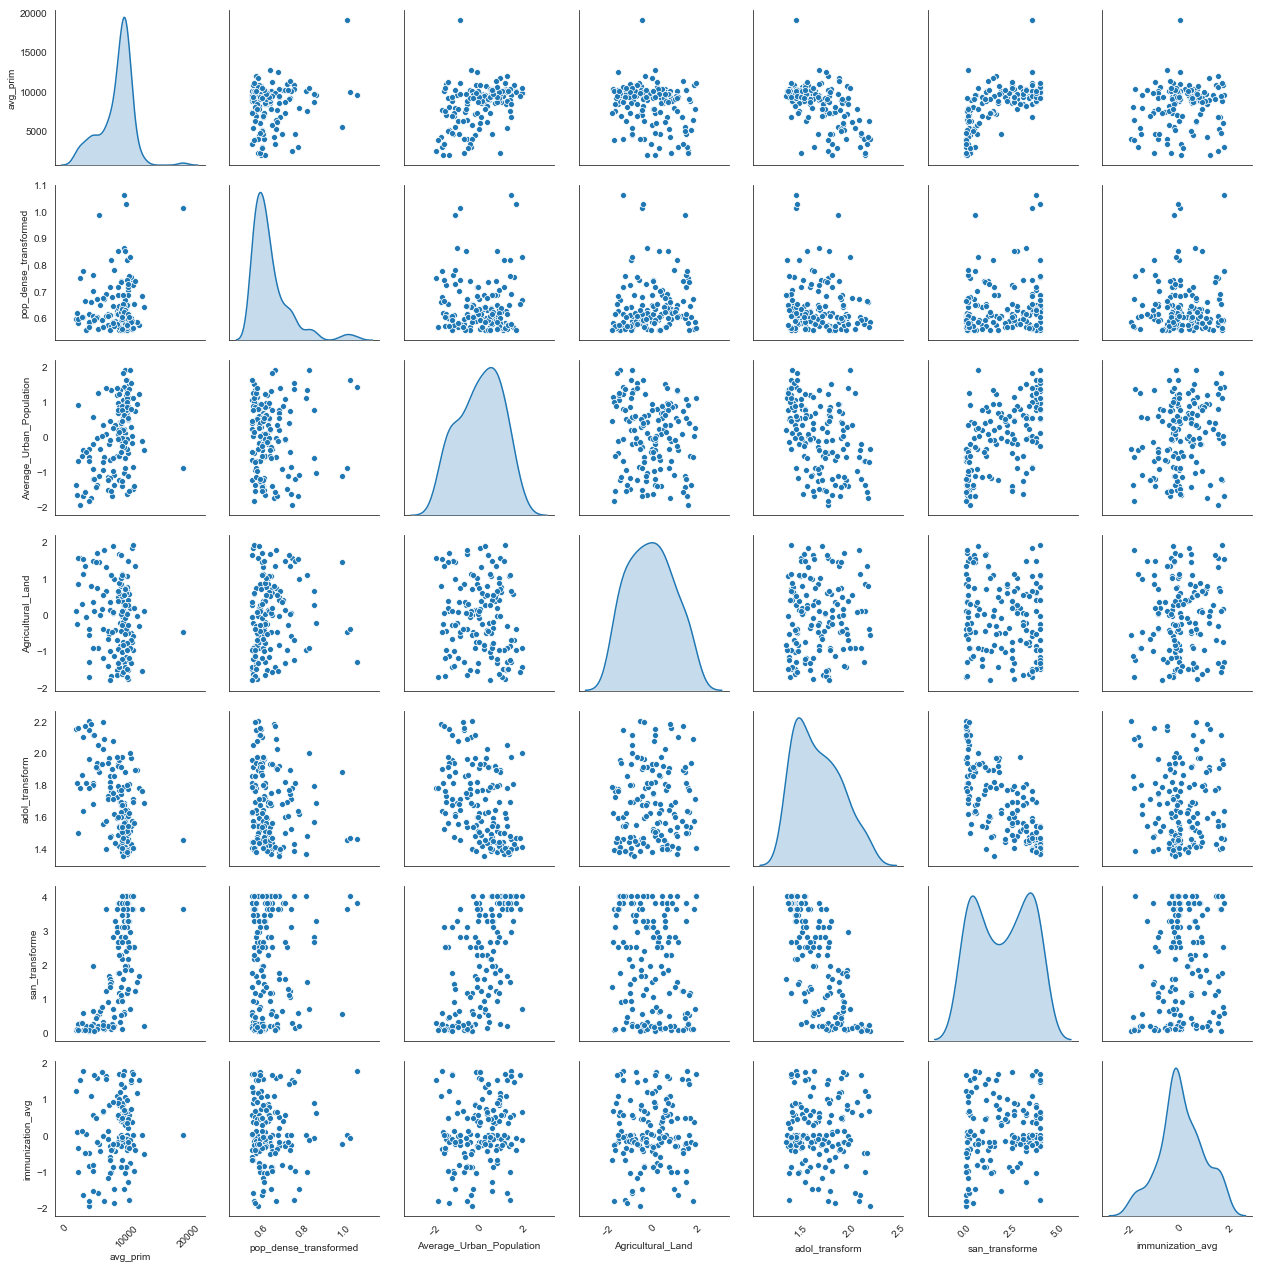

In [414]:
g = sns.pairplot(scaled_data2[["avg_prim",
                       "pop_dense_transformed", "Average_Urban_Population",
                       "Agricultural_Land", "adol_transform",
                       "san_transforme","immunization_avg"]], diag_kind="kde")
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

In [418]:
transformed=["Average_Urban_Population",
                       "Agricultural_Land", "adol_transform",
                       "san_transforme","immunization_avg"]
modells = ols(formula='avg_prim~'+"+".join(transformed),data=scaled_data2).fit()
modells.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avg_prim   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     22.69
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           9.65e-17
Time:                        15:52:11   Log-Likelihood:                -1347.2
No. Observations:                 150   AIC:                             2706.
Df Residuals:                     144   BIC:                             2724.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.013e+04   2041.889      4.960      0.000    6092.245    1.42e+04
Average_Urban_Population   157.1753    203.276      0.773      0.441    -244.616     558.966
Agricultural_Land         -211.8701    166.678     -1.271      0.206    -541.322     117.582
adol_transform           -2044.2936   1049.861     -1.947      0.053   -4119.424      30.836
san_transforme             815.0194    185.977      4.382      0.000     447.422    1182.617
immunization_avg            55.0913    192.000      0.287      0.775    -324.411     434.594
==============================================================================
Omnibus:                       25.634   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.586
Skew:                           0.674   Prob(JB):                     1.56e-14
Kurtosis:                       5.891   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [419]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()

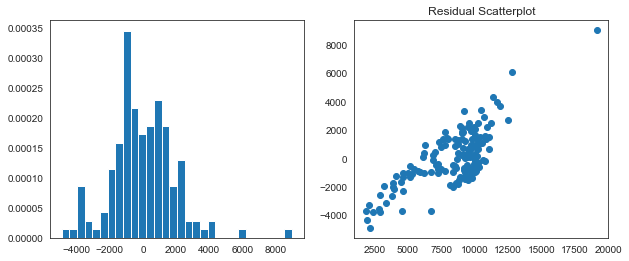

In [420]:
checkresiduals(scaled_data2,'avg_prim',modells)